In [ ]:
#@title Libraries
import pandas as pd
import seaborn as sns
from plotnine import *
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

# Data
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [ ]:
#@title Data Analysis
campaign['y'].value_counts() # 4208 (yes) < 32861 (no), imbalanced data

campaign.info() # Will need to change y column into binary 0,1

print(campaign.isna().sum()) # No NAs

campaign.head() # What the data looks like

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
#@title Data Wrangling
campaign['y'] = campaign['y'].map({'no' : 0,
                                       'yes' : 1}) # Change y column into binary 0,1

campaign['contacted'] = campaign['pdays'].apply(lambda p: 0 if p == 999 else 1) # Binary if yes or no if they been contacted before

campaign['ageBin'] = pd.cut(campaign['age'], 5)

In [ ]:
#@title Split the data into features and target
X = pd.get_dummies(campaign[['ageBin', 'nr.employed', 'euribor3m', 'previous', 'contacted']], drop_first = True) # Features
y = campaign['y'] # Target

In [ ]:
#@title Model creation

# Call oversampler
ro = RandomOverSampler()

# Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 420) # random state = 777 (100%), 69 (97%), 

# Oversample
XOver, yOver = ro.fit_resample(X_train, y_train)

# Create the model
clf = DecisionTreeClassifier()

# Train the model
clf.fit(XOver, yOver)

# Make predication
y_predictions = clf.predict(X_test)

In [ ]:
#@title F1, Precision, Recall, Accuracy
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6589
           1       0.39      0.48      0.43       825

    accuracy                           0.86      7414
   macro avg       0.66      0.69      0.68      7414
weighted avg       0.87      0.86      0.87      7414



In [ ]:
# Holdout mini dataset
holdout = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv')
holdout['contacted'] = holdout['pdays'].apply(lambda p: 0 if p == 999 else 1)
holdout['ageBin'] = pd.cut(holdout['age'], 5)
holdout = holdout[['ageBin', 'nr.employed', 'euribor3m', 'previous', 'contacted']]
holdout = pd.get_dummies(holdout, drop_first = True)

In [ ]:
# Save predictions as csv
holdoutPredict = clf.predict(holdout)

pd.DataFrame(holdoutPredict).to_csv('devin-predictions.csv', index = False)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ageBin_(30.6, 43.2]
- ageBin_(43.2, 55.8]
- ageBin_(55.8, 68.4]
- ageBin_(68.4, 81.0]
Feature names seen at fit time, yet now missing:
- ageBin_(33.2, 49.4]
- ageBin_(49.4, 65.6]
- ageBin_(65.6, 81.8]
- ageBin_(81.8, 98.0]



Text(0.5, 0.98, 'Term Deposits Among Clients and # of Previous Contacts')

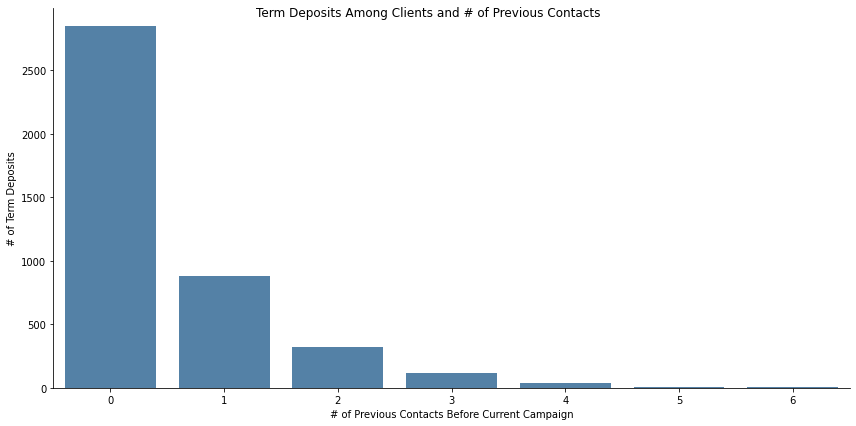

In [ ]:
p = sns.catplot(data = campaign[campaign['y'] == 1], x = 'previous', color = 'steelblue', kind = 'count', height = 6, aspect = 2)
p.set_axis_labels("# of Previous Contacts Before Current Campaign", "# of Term Deposits")
p.fig.suptitle('Term Deposits Among Clients and # of Previous Contacts')

Text(0.5, 0.98, 'Term Deposits Among Relationship Status And Age Group')

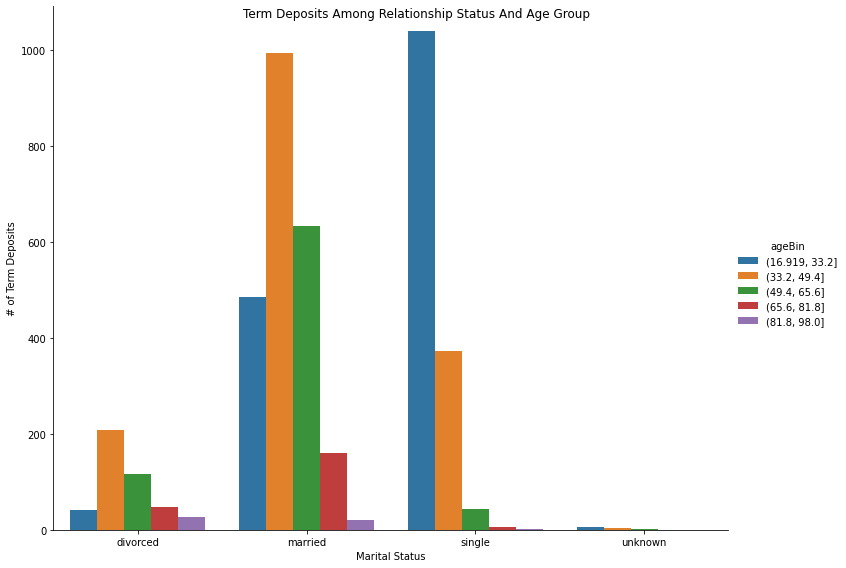

In [ ]:
p2 = sns.catplot(data = campaign[campaign['y'] == 1], x = 'marital', hue = 'ageBin', kind = 'count', height = 8, aspect = 1.3)
p2.set_axis_labels("Marital Status", "# of Term Deposits")
p2.fig.suptitle('Term Deposits Among Relationship Status And Age Group')

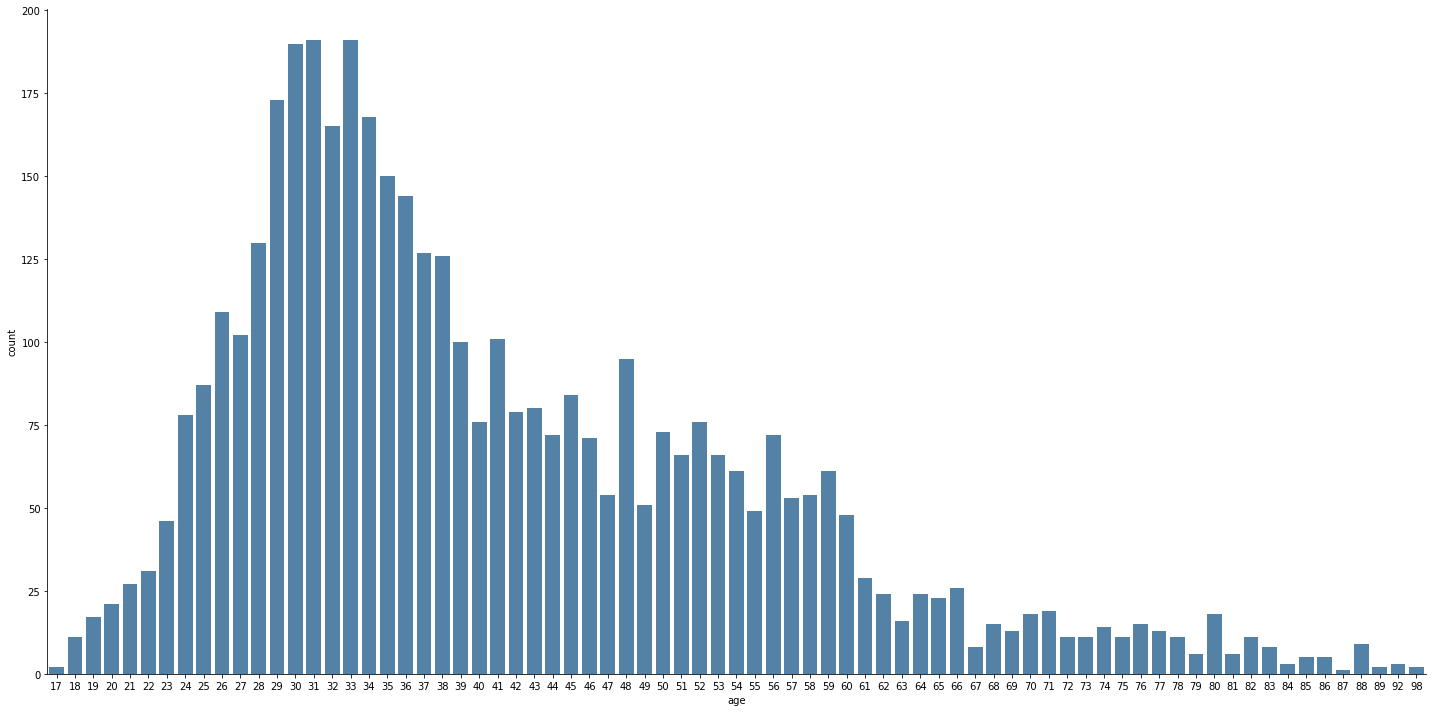

In [ ]:
sns.catplot(data = campaign[campaign['y'] == 1], x = 'age', color = 'steelblue', kind = 'count', height = 10, aspect = 2)